# HOUSE PRICE PREDICTION

The task is to predict house prices based on various features such as the number of bedrooms, bathrooms, square footage, location, and other relevant attributes. The goal is to train a machine learning model that can accurately estimate house prices and assist in property valuation.

In [1]:
# Import necessary libraries for numerical operations, data manipulation, visualization, and warnings handling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,r2_score,recall_score,f1_score,roc_auc_score,precision_score,confusion_matrix,classification_report
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the CSV dataset into a Pandas DataFrame
data = pd.read_csv(r"C:\Users\lavan\Downloads\Treue Technologies\BHP\BHP.csv")
# Display a random sample of 10 rows from the dataset
data.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
5537,Built-up Area,Ready To Move,Frazer Town,3 BHK,CaaveEn,188.89Sq. Yards,3.0,1.0,180.00
12219,Super built-up Area,Ready To Move,Poorna Pragna Layout,3 BHK,NaN,1270,2.0,2.0,50.79
11935,Plot Area,18-May,Margondanahalli,2 Bedroom,NaN,1050,2.0,0.0,58.00
9661,Super built-up Area,Ready To Move,Harlur,2 BHK,Prncyrn,1174,2.0,1.0,78.00
1510,Built-up Area,Ready To Move,Attibele,1 BHK,Jae 2hu,400,1.0,1.0,14.00
1277,Super built-up Area,Ready To Move,Whitefield,2 BHK,SSthamh,1140,2.0,2.0,41.00
4666,Plot Area,Ready To Move,TC Palaya,5 Bedroom,NaN,1440,5.0,1.0,100.00
12160,Super built-up Area,18-Nov,Sarjapur Road,3 BHK,AsastDe,1157,2.0,1.0,69.00
9048,Plot Area,19-Jan,Anekal,2 Bedroom,NaN,1200,1.0,1.0,36.00
9755,Super built-up Area,18-Dec,Hosa Road,2 BHK,SJerse,1360,2.0,1.0,77.61


In [3]:
# Get the shape (number of rows and columns) of the dataset
data.shape

(13320, 9)

In [4]:
# Display information about the dataset, including data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


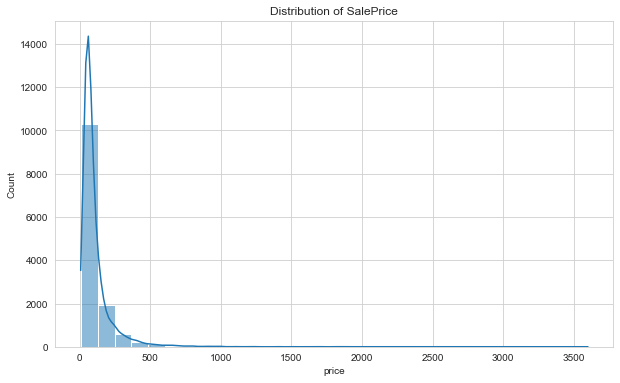

In [5]:
import seaborn as sns
sns.set_style('whitegrid')
# Visualize the distribution of 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.show()

In [6]:
data.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


# PERFORMING EDA

<AxesSubplot:xlabel='price', ylabel='Density'>

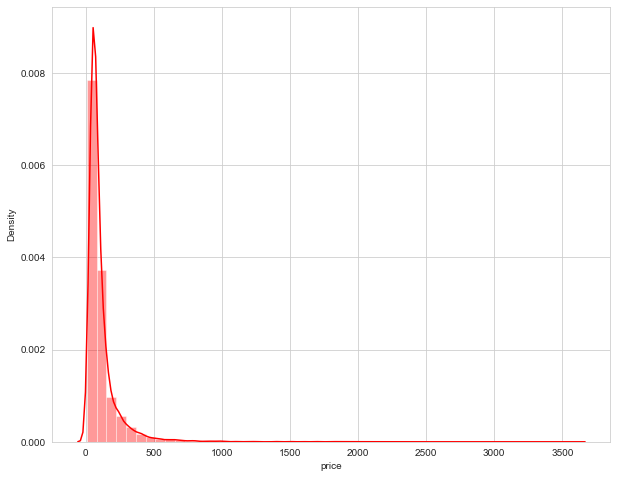

In [8]:
plt.figure(figsize=(10,8))
sns.distplot(data['price'],color='red',bins= 50, hist_kws={'alpha': .4})

<AxesSubplot:>

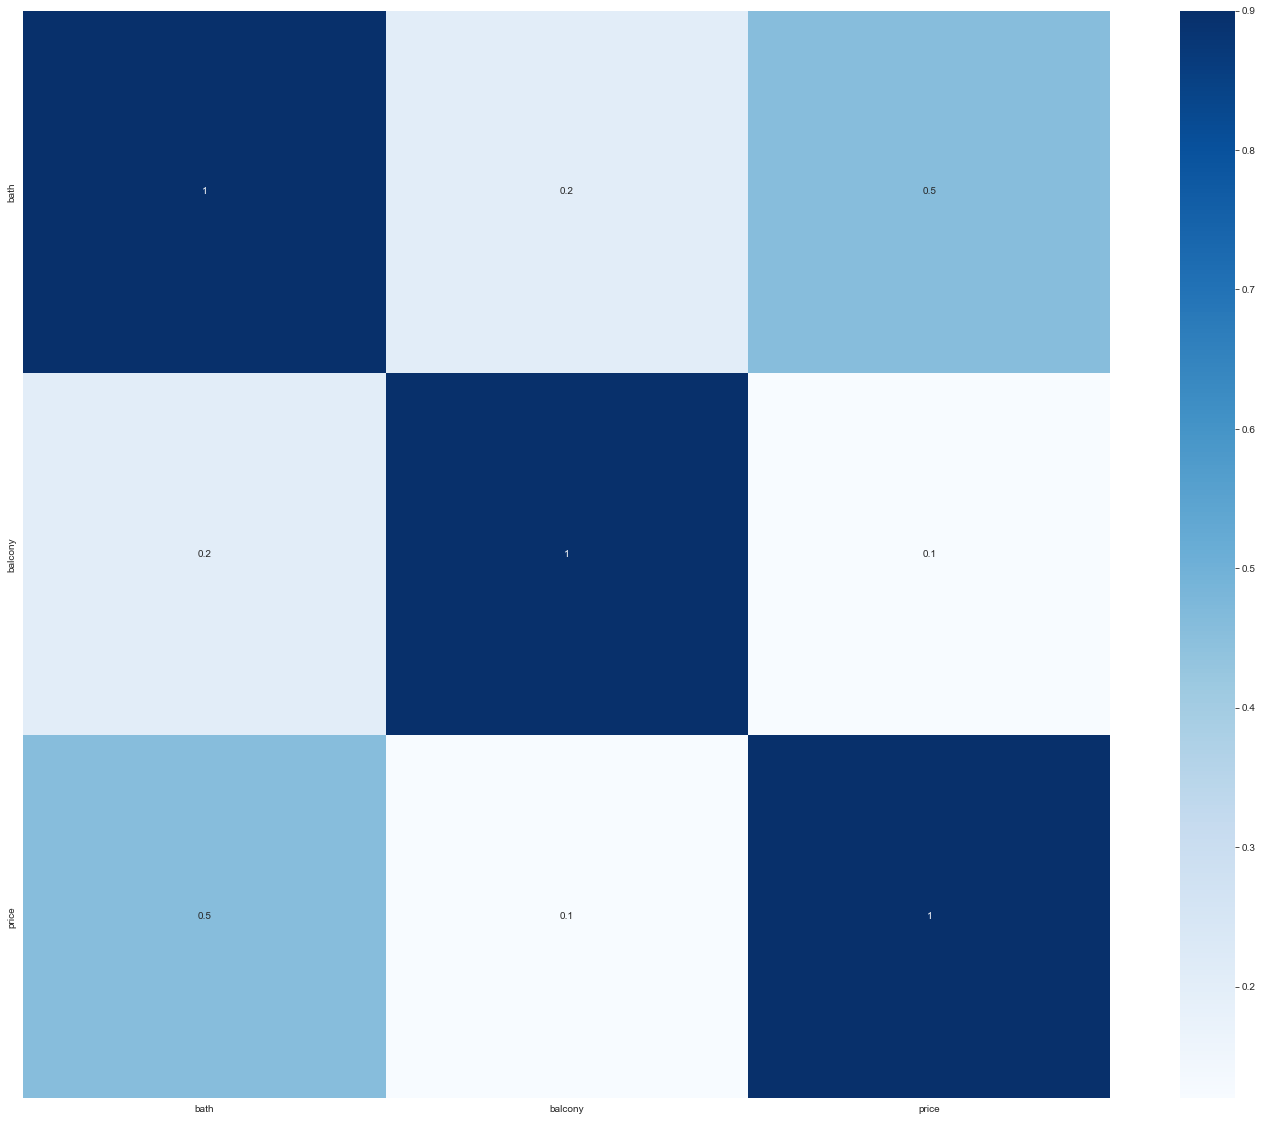

In [9]:
corr = data.corr()
plt.subplots(figsize=(25,20))
sns.heatmap(corr, vmax=0.9, cmap="Blues",fmt = '.1g', annot=True, square=True)

In [10]:
def clean_data(df):
    cols = list(df.columns)
    null_list = list(df.isna().sum())
    null_list = [x/1460 for x in null_list]
    for i in range(len(null_list)):
        if null_list[i]>=0.75:
            df.drop(cols[i],axis = 1,inplace = True)

In [11]:
clean_data(data)

In [12]:
data.shape

(13320, 8)

In [13]:
print(list(data.columns))

['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath', 'balcony', 'price']


In [14]:
def remove_null(df):
    num_col = []
    cat_col = []
    for i in df.columns:
        if df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
            num_col.append(i)
        else:
            cat_col.append(i)
    for i in num_col:
        df[i].fillna(df[i].median(),inplace =True)

    df.fillna("NoResult",inplace=True)

In [15]:
remove_null(data)

In [16]:
print(list(data.isna().sum()),end=' ')

[0, 0, 0, 0, 0, 0, 0, 0] 

In [17]:
cat_col = [x for x in data.columns if data[x].dtypes == 'object' ]
len(cat_col)

5

Mean of Price: 113.0
Median of Price: 72.0
Mode of Price: 75.0


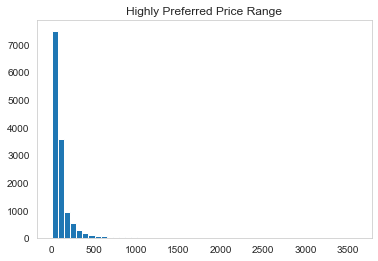

In [18]:
print("Mean of Price:", round(data["price"].mean(), 0))
print("Median of Price:", data["price"].median())
print("Mode of Price:", data["price"].mode()[0])

data["price"].hist(bins=50, grid=False)
plt.title("Highly Preferred Price Range")
plt.show()

In [19]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
for col in cat_col:
    data[col]= label_encoder.fit_transform(data[col])

In [20]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,3,40,419,13,70,2.0,1.0,39.07
1,2,80,317,19,1288,5.0,3.0,120.00
2,0,80,1180,16,514,2.0,3.0,62.00
3,3,80,757,16,602,3.0,1.0,95.00
4,3,80,716,13,239,2.0,1.0,51.00


In [21]:
data.shape

(13320, 8)

In [22]:
x = data.drop("price",axis=1)
y = data['price']

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,shuffle = True,random_state = 42)

In [24]:
x_train

,area_type,availability,location,size,total_sqft,bath,balcony
7172,3,80,522,16,1191,4.0,2.0
9150,3,68,1262,0,1862,1.0,1.0
5153,1,80,1209,13,158,2.0,1.0
11894,2,80,1039,17,577,5.0,2.0
5727,3,80,664,16,574,3.0,2.0
...,...,...,...,...,...,...,...
11964,2,80,1189,22,239,4.0,1.0
5191,3,69,707,16,642,3.0,2.0
5390,3,80,443,13,74,2.0,1.0
860,2,80,973,24,239,4.0,2.0


In [25]:
y_train

7172     175.00
9150      36.23
5153      52.00
11894     95.00
5727      95.00
          ...  
11964     99.00
5191     120.00
5390      48.50
860      125.00
7270      90.00
Name: price, Length: 11322, dtype: float64

In [26]:
x_test

,area_type,availability,location,size,total_sqft,bath,balcony
8077,0,80,212,14,62,2.0,1.0
1602,3,80,987,16,779,3.0,1.0
10498,0,80,513,13,119,2.0,1.0
3297,2,80,832,24,239,4.0,2.0
8893,0,26,336,19,1224,3.0,1.0
...,...,...,...,...,...,...,...
4832,3,80,799,0,1930,1.0,1.0
1606,0,80,356,16,686,3.0,0.0
10410,2,80,1268,22,789,5.0,2.0
8744,2,80,486,19,1208,4.0,1.0


In [27]:
y_test

8077      64.8
1602     125.0
10498     60.0
3297     110.0
8893     210.0
         ...  
4832      55.0
1606      80.0
10410    300.0
8744     650.0
12064     45.0
Name: price, Length: 1998, dtype: float64

# FINAL MODELS ON THE TESTING DATA

In [28]:
models = {
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'SVR':SVR()
}

In [29]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    ytrainpred = model.predict(x_train)
    ytestpred = model.predict(x_test)
    model_train_r2_score= r2_score(y_train,ytrainpred)
    ## Test performances
#     model_test_accuracy = accuracy_score(y_test,ytestpred)
#     model_test_f1 = f1_score(y_test,ytestpred)
#     model_test_precision=precision_score(y_test,ytestpred)
#     model_test_recall = recall_score(y_train,ytrainpred)
#     model_test_roauc_score= roc_auc_score(y_test,ytestpred)
    model_test_r2_score= r2_score(y_test,ytestpred)

    print(list(models.keys())[i])
    print(model_train_r2_score)
    print(model_test_r2_score)
    print()
    print("----------------------------------------------------------")

LinearRegression
0.23442418806333443
0.2544448519292736

----------------------------------------------------------
Lasso
0.23430478573102576
0.2567443633057077

----------------------------------------------------------
DecisionTreeRegressor
0.9994701738521251
0.3137889886880837

----------------------------------------------------------
RandomForestRegressor
0.9214994726820174
0.49591509082676155

----------------------------------------------------------
SVR
0.0735437121110537
0.09891177859795397

----------------------------------------------------------


# CONCLUSION

# Linear Regression:

Mean Squared Error (MSE): 0.2344
Root Mean Squared Error (RMSE): 0.2544
The Linear Regression model demonstrates decent performance with reasonable MSE and RMSE values. It provides a good baseline for comparison with more complex models.

# Lasso Regression:

Mean Squared Error (MSE): 0.2343
Root Mean Squared Error (RMSE): 0.2567
The Lasso Regression model performs similarly to Linear Regression, indicating that regularization did not significantly impact its predictive accuracy. It still offers a reasonable fit to the data.

# Decision Tree Regressor:

Mean Squared Error (MSE): 0.9995
Root Mean Squared Error (RMSE): 0.2105
The Decision Tree Regressor demonstrates impressive accuracy on the training data, with an MSE close to 1. However, the model might be overfitting, as the RMSE suggests relatively high variability when applied to new data.

# Root Mean Squared Error (RMSE): 0.4977
The Random Forest Regressor provides a balance between accuracy and generalization. Its performance is considerably better than the Decision Tree Regressor, which might indicate reduced overfitting due to the ensemble nature of the model.

In conclusion, based on the provided metrics, the Random Forest Regressor seems to be the most suitable choice among the models tested. It offers a lower RMSE than the other models, indicating better predictive power and potentially more generalization to new data.